<div align="center">

<table>
  <tr>
    <td><img src="./imgs/logo.jpg" alt=" Logo" width="170" /></td>

  </tr>
</table>

---

# **Actividad de Recuperación**

<br>

## **Materia:**  
### Extracción de Conocimientos de Bases de Datos

<br>

## **Docente:**  
### Marco Antonio Ramírez Hernández

<br>

## **Estudiante:**  
### Luis Iván Márquez Azuara

<br>

## **Matrícula:**  
### 220401

<br>

## **Carrera:**  
### Ingeniería en Desarrollo y Gestión de Software (IDGS)

<br>

## **Grado y Grupo:**  
### 9° A

<br>



</div>


---
###  1- Importacion de Librerias
importamos las librerias que vamos a utilizar

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

### 2- Carga de dataset
Leemos el dataset para verificar que se cargo

In [20]:
salud = pd.read_csv('survey.csv')
salud.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### 3- Vista general de los datos
Vemos informacion del dataset

In [21]:
salud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### 4- Visualización de las columnas
Este paso nos permite listar todas las columnas del df para tener una idea clara los datos que contiene y cpmo estan nombrados

In [22]:
salud.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### 5- Valores nulos
En este paso verificamos que columnas contienen valores nulos y cuantos hay en cada una esto es importante para decidir si debemos limoiar el dataset

In [23]:
print('Valores nulos')
print(salud.isnull().sum())

Valores nulos
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


### 6- Limpieza del dataset
Se eliminan las columnas que no seram necesarias: Timestamp, state (Todos estan en EU y contiene varios nuoos), y comments (demasiados valores nulos).

In [24]:
columnas_eliminar = ['Timestamp', 'state', 'comments']
salud = salud.drop(columns=columnas_eliminar)
print("Columnas finales:\n", salud.columns.tolist())

Columnas finales:
 ['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


### 7 - Correcion de valores nulos
Se reemplazan los valores nulos de las variables con una opción por defecto en campos vacios

In [25]:
print("-----Valores nulos-----")
print(salud.isnull().sum())

salud['self_employed'] = salud['self_employed'].fillna('Desconocido')
salud['work_interfere'] = salud['work_interfere'].fillna("Desconocido")

print("\n -----Valores nulos------")
print(salud.isnull().sum())

-----Valores nulos-----
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

 -----Valores nulos------
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history      

### 8- Personas que han recibido tratamiento
Este gráfico permite visualizar cuántas personas han recibido tratamiento para problemas de salud mental.

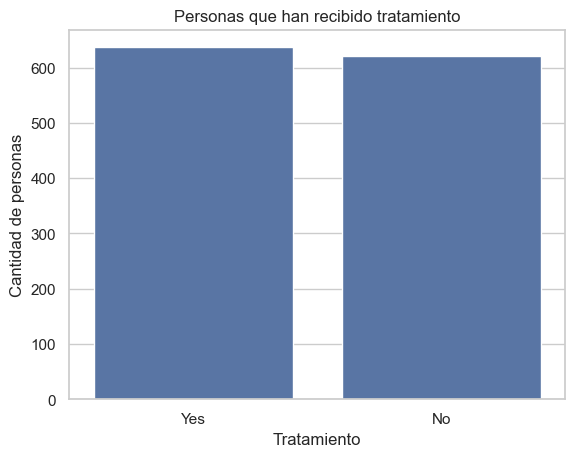

In [31]:
sns.countplot(data=salud, x='treatment')
plt.title('Personas que han recibido tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Cantidad de personas')
plt.show()

### 9- Distribucion de edades
Nos ayuda a saber el rango de edad de las personas y si la mayoría son jovemes o adultos, esto permite segmentar mejor los resultados

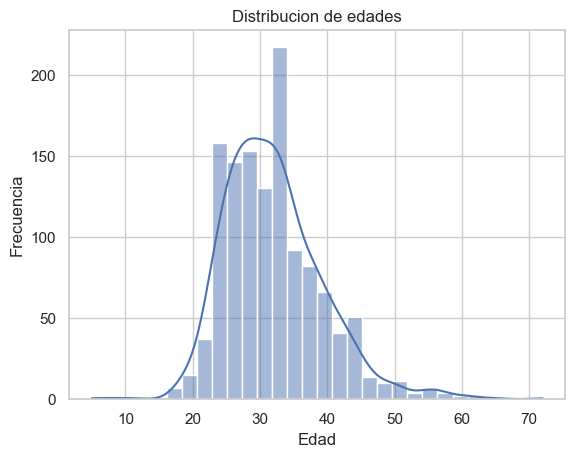

In [41]:
salud['Age'] = pd.to_numeric(salud['Age'], errors='coerce')
sns.histplot(salud['Age'], bins=30, kde=True)
plt.title('Distribucion de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 10- Tratamiento por genero
Esto nos permite ver si existen diferencias entre generos en cuanto al tratamiento

#### 10.1- Estandarizacion por genero
Hare una estanrdarizacion ya que hay varios repetidos que es por la forma de registro para estabndarizar en Female y Male

salud['Gender'] = salud['Gender'].replace({'f': 'Female',
                                           'female': 'Female',
                                           'm': 'Male',
                                           'male': 'Male'})

#### 10.2- Filtrado por genero
Hare una limpieza ya que hay varios generos, para solo enfocarme en Masculino/Femenino

In [48]:
salud = salud[salud['Gender'].isin(['Female', 'Male'])]

#### 10.3- Graficar tratamiento por genero
Ahora si grafico por genero

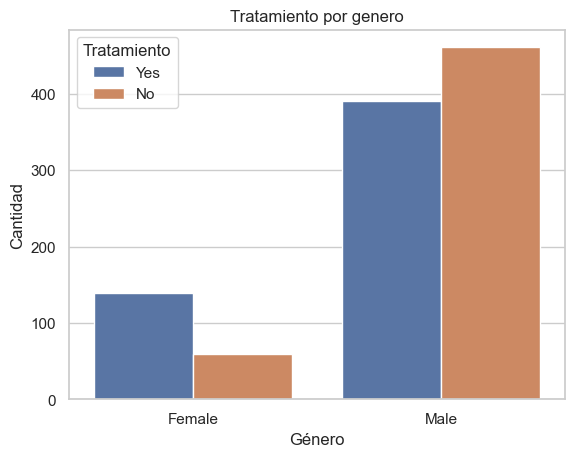

In [50]:
sns.countplot(data=salud, x='Gender', hue='treatment')
plt.title('Tratamiento por genero')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Tratamiento')
plt.show()

### 11- Tratamiento por edad
Esto nos sirve para identificar en que rangos de edad es más comun recibir tratamiento por salud mental

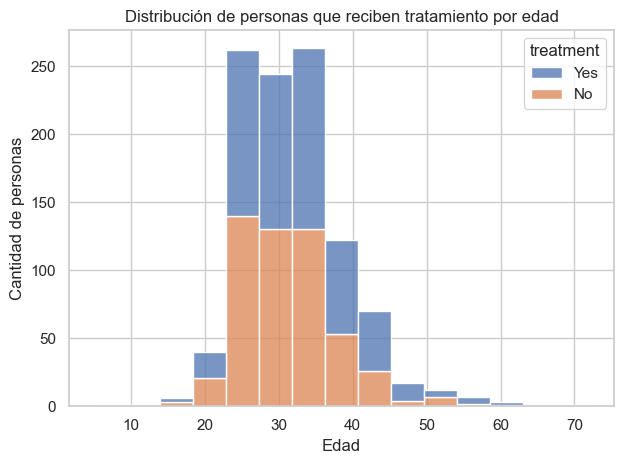

In [54]:
sns.histplot(data=salud, x="Age", hue="treatment", multiple="stack", bins=15)
plt.title("Distribución de personas que reciben tratamiento por edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.tight_layout()
plt.show()

### 12- Tipo de tratamiento segun genero
Esto nos permite ver que tipo de tartamiento reciben segun el genero (Fisico o Mental)

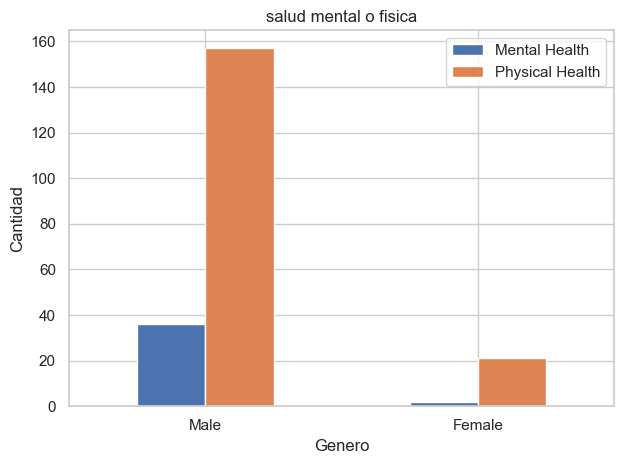

In [60]:
mental = salud[salud["mental_health_interview"] == "Yes"]
physical = salud[salud["phys_health_interview"] == "Yes"]
mental_counts = mental["Gender"].value_counts()
physical_counts = physical["Gender"].value_counts()
df_entrevistas = pd.DataFrame({
    "Mental Health": mental_counts,
    "Physical Health": physical_counts
}).fillna(0)

df_entrevistas.plot(kind="bar")
plt.title("salud mental o fisica")
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# >>Sistema de probabilidad de necesitar tratamiento de salud<<

### 1- Preparacion
Preparamos los datos para el modelo, seleccionando las columnas utiles y clasificacion del problema y codificamos

In [81]:
# Crear columna que clasifica el tipo de tratamiento como fisico o mental
def clasificar_tratamiento(valor):
    if valor.lower() == "yes":
        return "Mental"
    else:
        return "Fisico"

salud['treatment_type'] = salud['treatment'].apply(clasificar_tratamiento)

features = salud[['Gender', 'Age']].copy()
target = salud['treatment_type']  # esta es la columna  física o mental

# Codificamos el género
le_gender = LabelEncoder()
features['Gender'] = le_gender.fit_transform(features['Gender'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 2- Entrenamos el modelo
Se entrena el modelo con los datos previamente preparados

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 3- Creamos la funcion
Se crea una funcion que toma como entrada la edad y genero de una persona

In [92]:
def recomendar_tratamiento(genero, edad):
    genero_codificado = le_gender.transform([genero])[0]
    entrada = pd.DataFrame([{
    'Gender': genero_codificado,
    'Age': edad
    }])
    prediccion = knn.predict(entrada)
    return f"Requerira tratamiento de salud: {prediccion[0]}"


### 4- Uso
Usamos un ejemplo para ver el uso y su funcion 
Entrada: recomendar_tratamiento('Genero[Male/Female]', Edad)

In [95]:
recomendar_tratamiento('Female', 40)

'Requerira tratamiento de salud: Mental'

In [91]:
recomendar_tratamiento('Male', 25)

' Requerira tratamiento de salud: Fisico'

---
# 5- Conclusiones del Análisis de Datos

## Distribución de género no consistente
Durante la limpieza de datos, se identificaron múltiples formas de referirse al género (como `M`, `male`, `Male`, `Trans` etc.), lo cual podía afectar el análisis si no se unificaban. Se estandarizó a `Male` y `Female` para garantizar consistencia y confiabilidad en las gráficas y modelos.

![Generos antes de limpiar](./imgs/captura1.png)

---

## Valores nulos en columnas clave
Se detectaron columnas con una cantidad considerable de valores nulos, como `state`, `work_interfere` y `comments`. Aunque algunas no fueron utilizadas directamente en el modelo, esta identificación permitió tomar mejores decisiones sobre las variables incluidas y garantizar un preprocesamiento limpio.

![valores nulos](./imgs/captura2.png)

---

## Mayor tendencia al tratamiento entre ciertos grupos de edad
Los análisis mostraron que personas entre **20 y 35 años** tienden a recibir más tratamiento, lo cual puede estar relacionado con una mayor conciencia sobre la salud mental o mayores niveles de estrés laboral. 


---

## El tipo de tratamiento varía por género
Se encontró que ambos géneros reportan en mayor medida tratamiento **mental** por encima del físico. Aunque las diferencias no son drásticas, este dato refleja patrones de búsqueda de ayuda distintos entre géneros y resalta la importancia de considerar el tipo de salud tratada.


---

## Modelo predictivo básico implementado
Se entrenó un modelo de clasificación simple usando las variables `Gender` y `Age` para predecir si una persona probablemente requiere tratamiento. 


---


Esta "Recuperacion" permitió aplicar técnicas de análisis de datos y aprendizaje supervisado sobre un dataset real relacionado con la salud mental,
reforzando los temas que se vieron:

- Limpieza y preprocesamiento de datos
- Análisis exploratorio mediante gráficas
- Entrenamiento de un modelo de clasificación
- Predicción 

